# Intro to Decision Tree Regression

In [9]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
print(diabetes.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [10]:
X = diabetes.data
y = diabetes.target

## Train the Decision Tree

In [18]:
from sklearn.tree import DecisionTreeRegressor

tree_clf = DecisionTreeRegressor(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeRegressor(max_depth=2)

In [19]:
diabetes.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [20]:
# Plot the tree

from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file = "diabetes_tree.dot",
    feature_names = diabetes.feature_names,
    filled = True
)

In [21]:
!dot -Tpng iris_tree.dot -o iris_tree.png

## Viz2

[Text(418.5, 453.0, 's5 <= -0.004\nmse = 5929.885\nsamples = 442\nvalue = 152.133'),
 Text(209.25, 271.8, 'bmi <= 0.006\nmse = 3240.821\nsamples = 218\nvalue = 109.986'),
 Text(104.625, 90.59999999999997, 'mse = 2143.968\nsamples = 171\nvalue = 96.31'),
 Text(313.875, 90.59999999999997, 'mse = 4075.084\nsamples = 47\nvalue = 159.745'),
 Text(627.75, 271.8, 'bmi <= 0.015\nmse = 5135.611\nsamples = 224\nvalue = 193.152'),
 Text(523.125, 90.59999999999997, 'mse = 4095.838\nsamples = 116\nvalue = 162.681'),
 Text(732.375, 90.59999999999997, 'mse = 4184.05\nsamples = 108\nvalue = 225.88')]

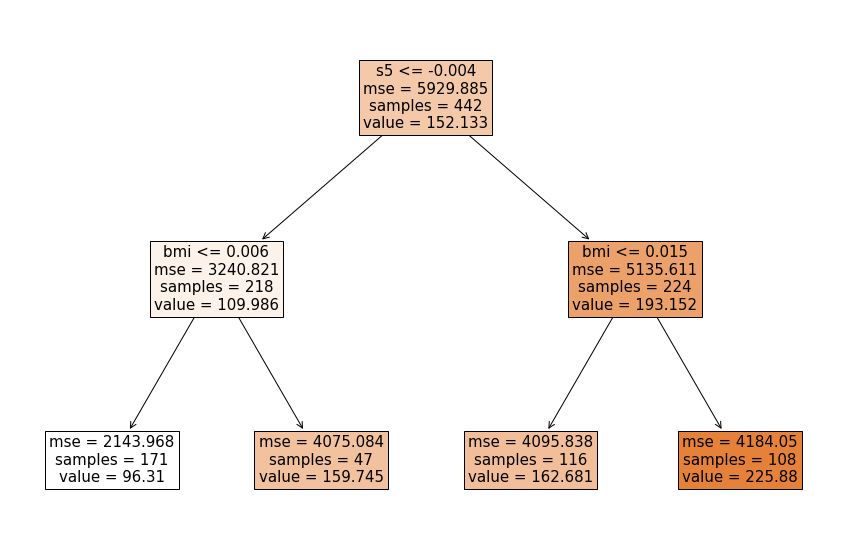

In [23]:
from sklearn import tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (15,10))

tree.plot_tree(
    tree_clf,
    filled = True,
    feature_names = diabetes.feature_names,
    fontsize = 15
)

# Example Comparison Max Depth

In [29]:
import numpy as np

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))


In [30]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

DecisionTreeRegressor(max_depth=5)

In [31]:
# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

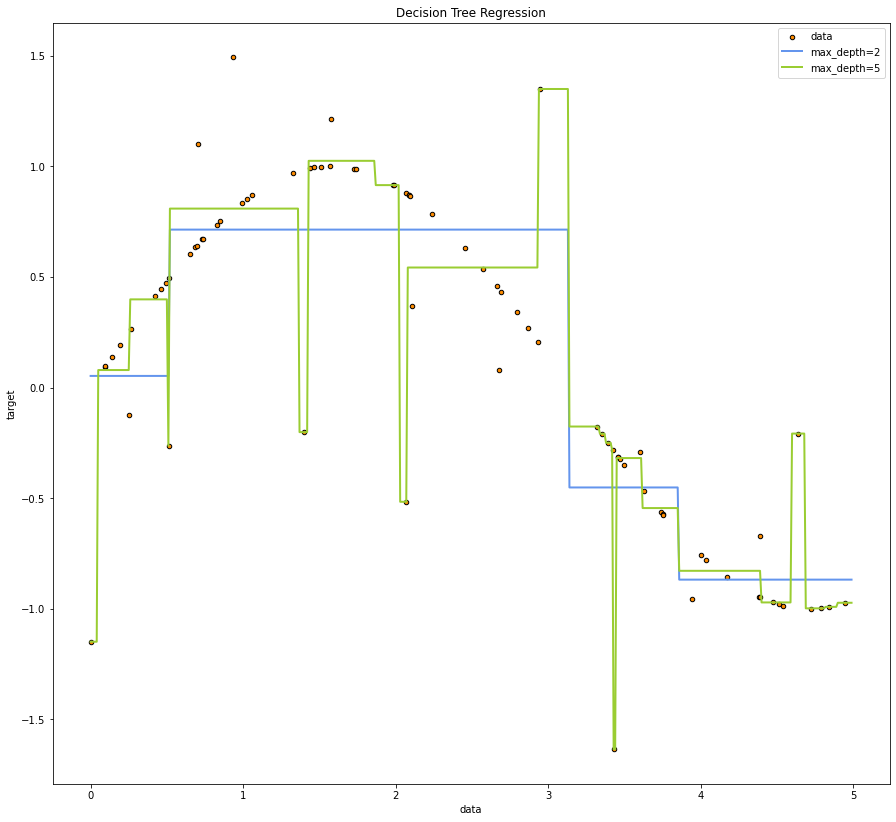

In [33]:
# Plot the results
plt.figure(figsize=(15, 14))
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()